#### 
NAME  : RAHINI DEVI S

ROLLNO: 225229129

## SMA_Labsheet - 7: Detecting communities in large networks using networkx package

#### EXERCISSE - 1
1. Import the networkx package and set up the environment to initialise communities

In [6]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

In [7]:
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

#### 
2. Initialise the karate club graph and find the number of communities

In [11]:
G_karate = nx.karate_club_graph()
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
print(f"The karate club has {len(communities)} communities.")

The karate club has 3 communities.


#### 
3. Define utility functions to assign the communities to nodes and edges

In [13]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                G.nodes[v]['community'] = c + 1

In [14]:
def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                G.edges[v, w]['community'] = 0

In [15]:
def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)

#### 
4. Visualise the communities by plotting the graph

In [16]:
set_node_community(G_karate, communities)
set_edge_community(G_karate)
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

In [17]:
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

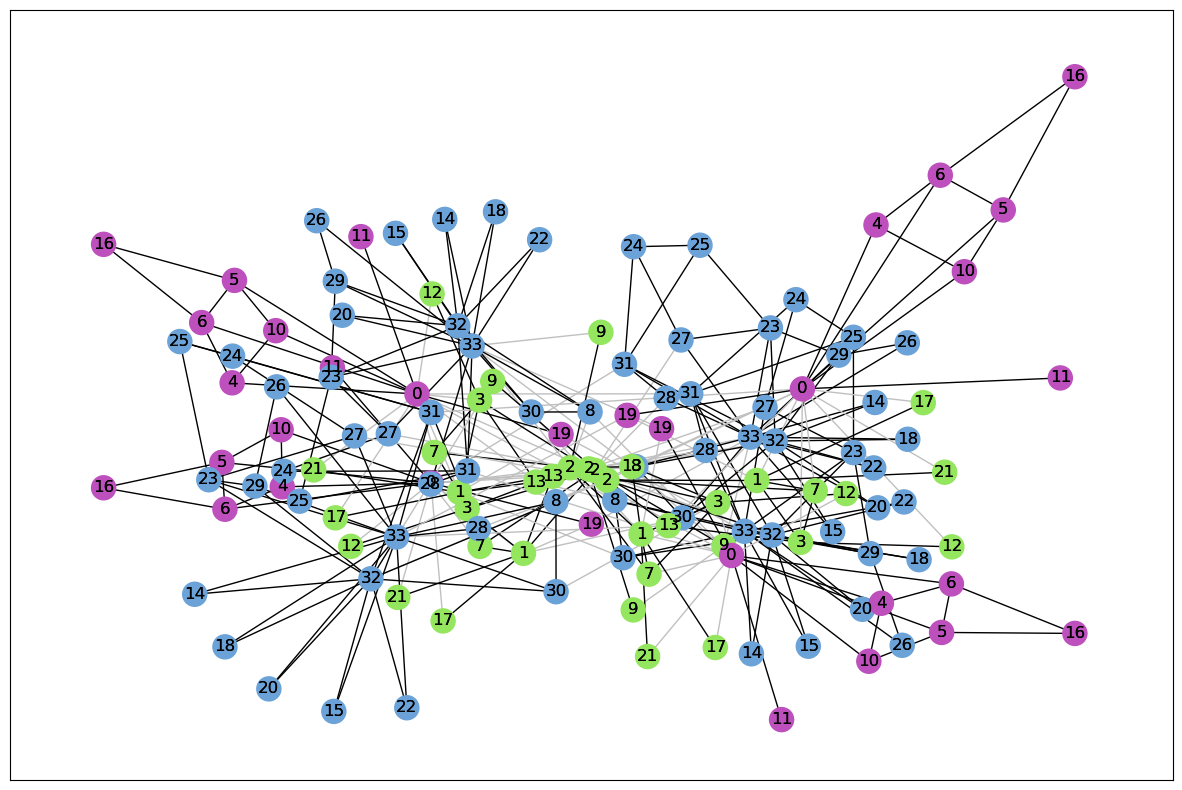

In [23]:
karate_pos = nx.spring_layout(G_karate)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(G_karate,pos=karate_pos,node_size=0,edgelist=external,edge_color="silver")
nx.draw_networkx(G_karate,pos=karate_pos,node_color=node_color,edgelist=internal,edge_color=internal_color)
plt.show()

### Exercise - 2
1. Import the facebook dataset and find the communities using the above steps

In [44]:
data_path = './facebook_combined.txt'
G_social = nx.read_edgelist(data_path)

In [41]:
df = open("facebook_combined.txt", "r")
print(df.read())

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

#### 
2. Plot the graph and visualise it

In [45]:
G_social = nx.read_edgelist(data_path)

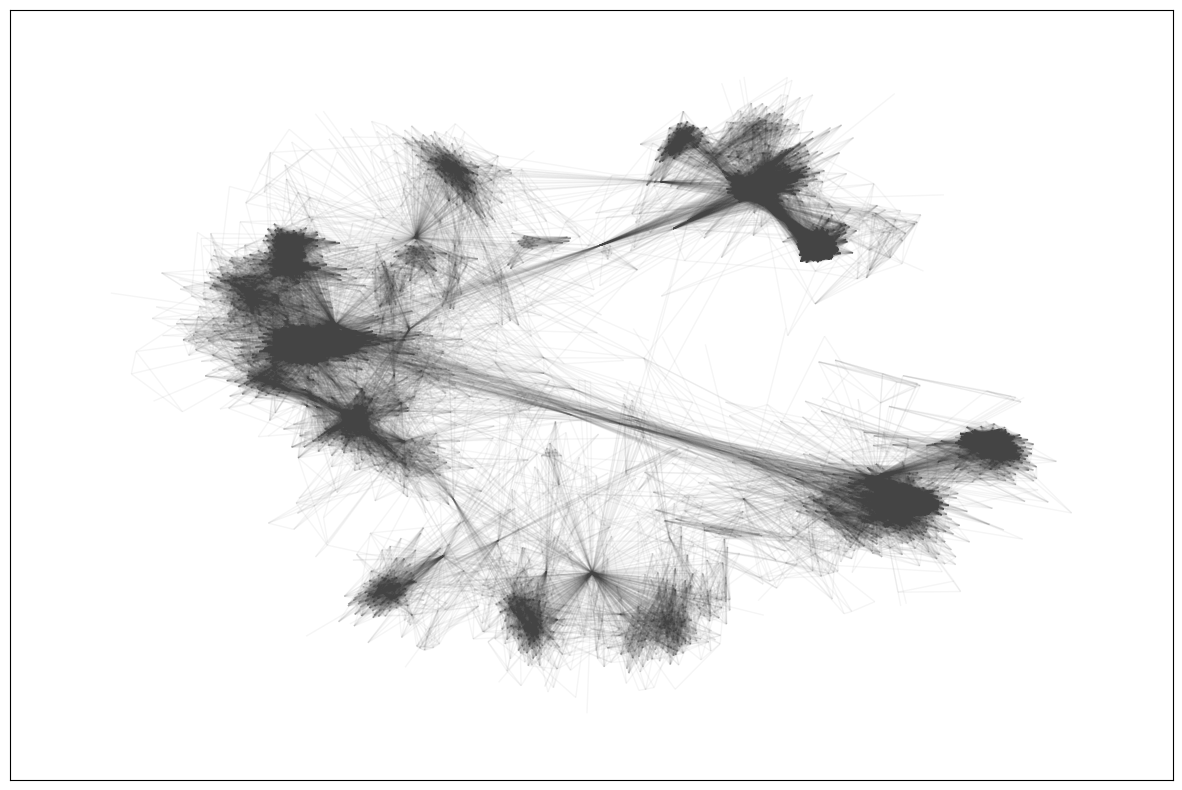

In [46]:
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(G_social,pos=pos,node_size=0,edge_color="#444444",alpha=0.05,with_labels=False)
plt.show()

#### 
3. Render the graph using the defined utility functions

In [47]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

16

In [48]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
set_node_community(G_social, communities)
set_edge_community(G_social)

In [49]:
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]

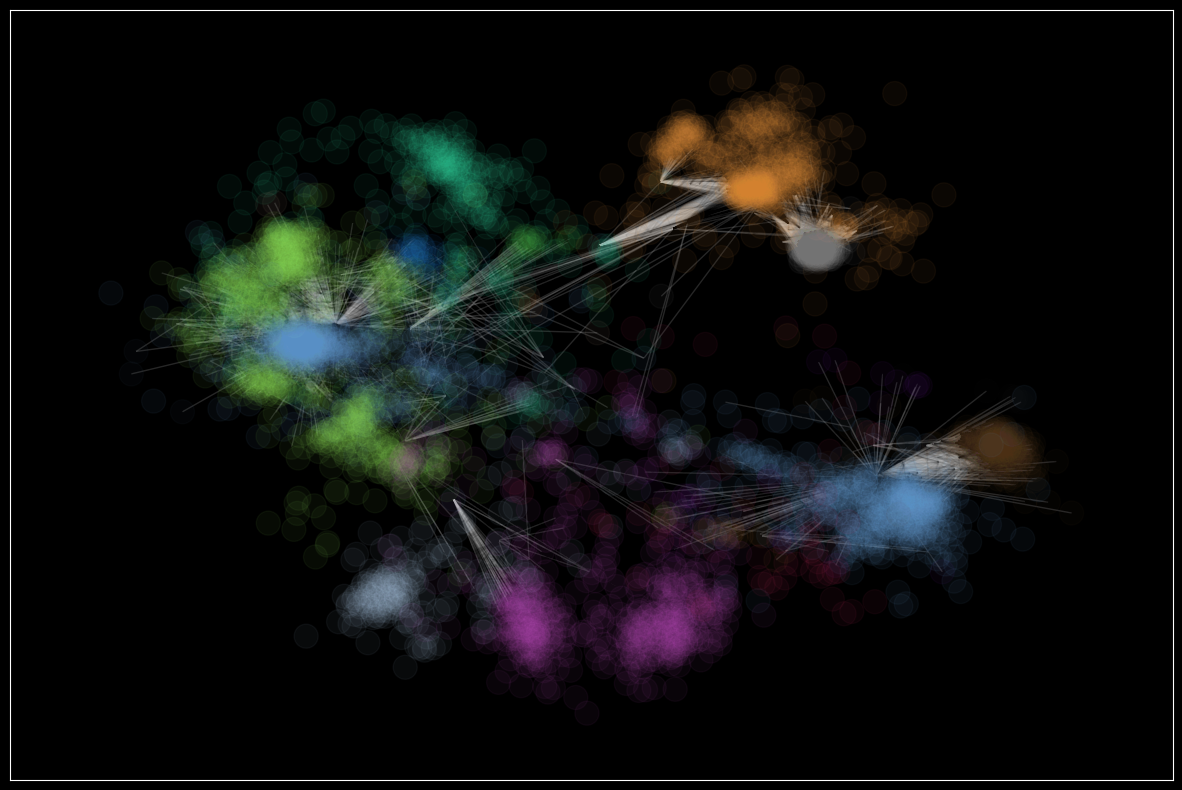

In [50]:
nx.draw_networkx(G_social,pos=pos,node_size=0,edgelist=external,edge_color="silver",node_color=node_color,alpha=0.2,with_labels=False)
nx.draw_networkx(G_social, pos=pos,edgelist=internal,edge_color=internal_color,node_color=node_color,alpha=0.05,with_labels=False)
plt.show()

#### 
4. Apply Girvan Community Detection to find the communities from the 2 datasets - karate club and facebook

In [51]:
result = nxcom.girvan_newman(G_karate)
communities = next(result)
len(communities)

2

In [52]:
 plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

In [53]:
set_node_community(G_karate, communities)
set_edge_community(G_karate)

In [54]:
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]
karate_pos = nx.spring_layout(G_karate)

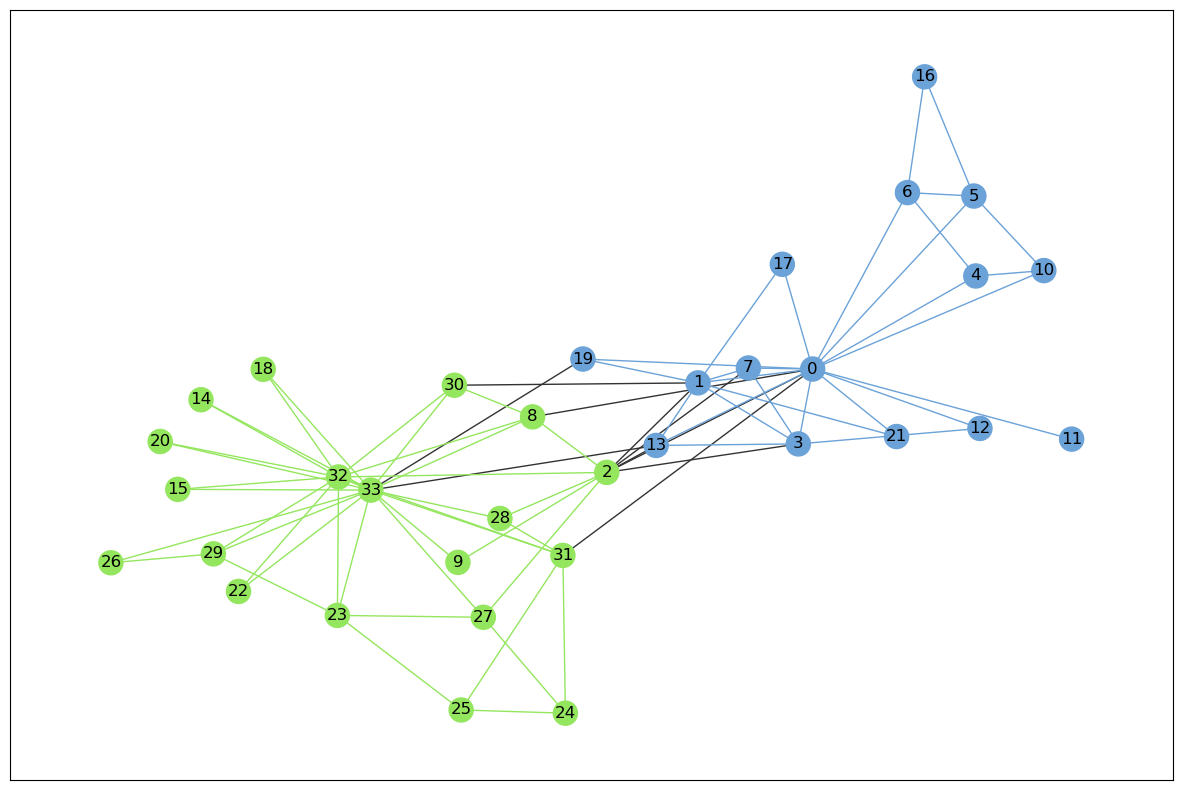

In [55]:
nx.draw_networkx(G_karate, pos=karate_pos, node_size=0,edgelist=external, edge_color="#333333", with_labels=False)
nx.draw_networkx(G_karate, pos=karate_pos, node_color=node_color,edgelist=internal, edge_color=internal_color)
plt.show()

#### 
5. Find the Cliques, k-plex and k-core from the graph

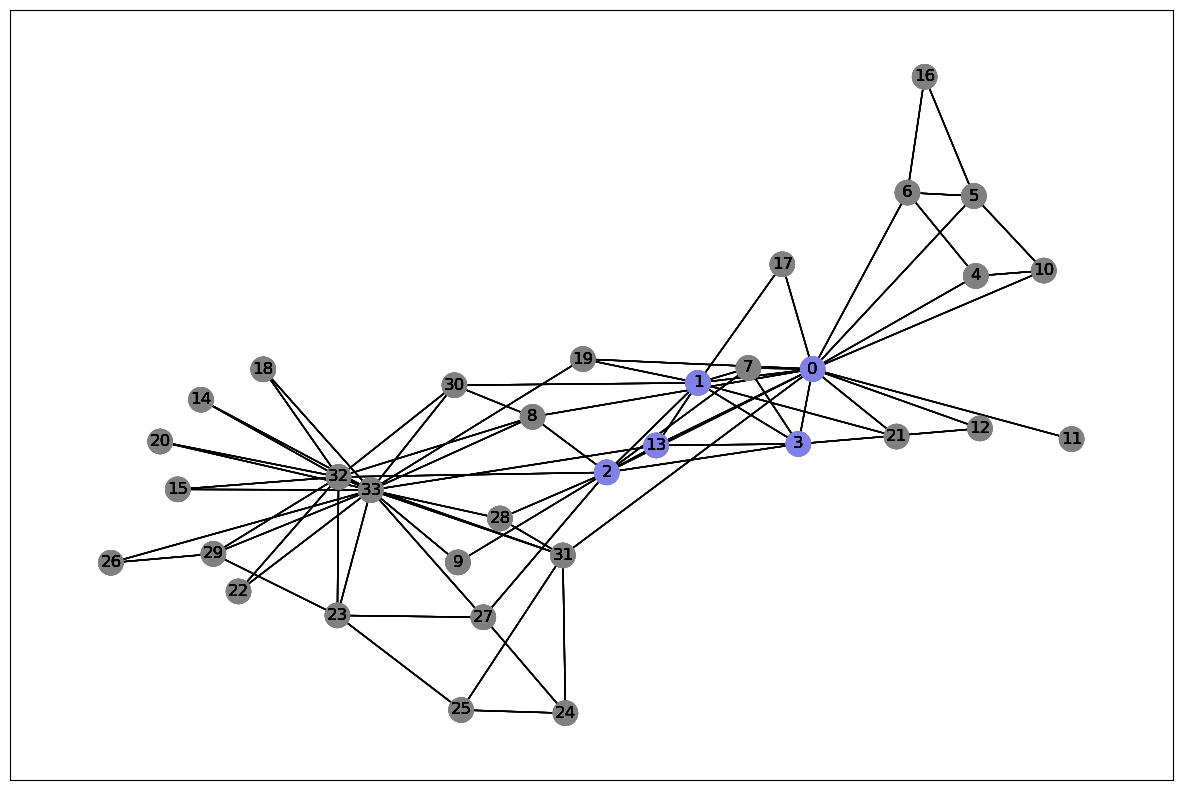

In [56]:
#Cliques

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
cliques = list(nx.find_cliques(G_karate))
max_clique = max(cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
        nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)
plt.show()      

In [58]:
# k-core

G_core_30 = nx.k_core(G_social, 30)
G_core_60 = nx.k_core(G_social, 60)

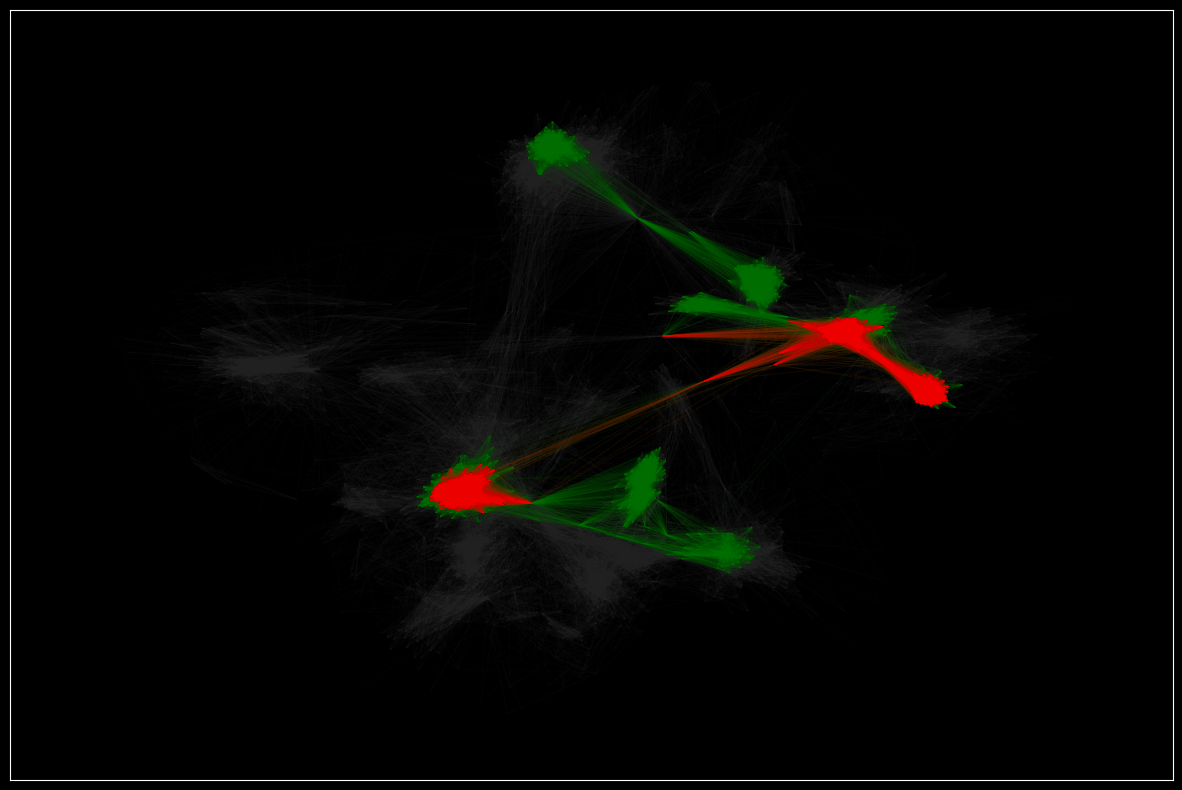

In [59]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_30, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_60, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)
plt.show()